# Imitation Learning 'Enjoy' Metrics Dashboard

In [3]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("~/dev/harvard/gym-duckietown-fork/learning/metrics-enjoy-snapping.csv") 
data.head()

,datetime,step,x,y,angle,speed,steering,center_dist,center_angle,reward,total_reward
0,2019-11-12 15:41:41.844231,1,2.647548,2.919155,4.934089,0.75,1.000000,-0.130730,-0.029120,14.864401,14.864401
1,2019-11-12 15:41:50.104820,2,2.656268,2.951922,5.010862,0.75,0.945772,-0.141533,-0.358443,12.705726,27.570127
2,2019-11-12 15:41:50.186790,3,2.656487,2.947024,4.324588,0.75,-1.000000,-0.141496,0.340801,12.832237,40.402364
3,2019-11-12 15:41:50.304596,4,2.644860,2.980022,4.422627,0.75,1.000000,-0.132771,0.160248,14.454792,54.857156
4,2019-11-12 15:41:50.386756,5,2.636518,3.013998,4.520665,0.75,0.999998,-0.130531,-0.037889,14.874159,69.731315


In [5]:
data.tail()

,datetime,step,x,y,angle,speed,steering,center_dist,center_angle,reward,total_reward
1837,2019-11-12 15:43:45.984463,1838,2.242340,0.825605,-9.895583,0.75,-1.0,-0.065105,0.470805,16.511842,29382.281689
1838,2019-11-12 15:43:46.026137,1839,2.210420,0.811282,-9.797543,0.75,1.0,-0.050782,0.372765,17.836821,29400.118510
1839,2019-11-12 15:43:46.077543,1840,2.177252,0.800152,-9.699504,0.75,1.0,-0.039652,0.274726,18.773569,29418.892079
1840,2019-11-12 15:43:46.128973,1841,2.143153,0.792322,-9.601465,0.75,1.0,-0.031822,0.176687,19.384018,29438.276096
1841,2019-11-12 15:43:46.179018,1842,2.108452,0.787868,-9.503426,0.75,1.0,-0.027368,0.078648,19.713444,29457.989540


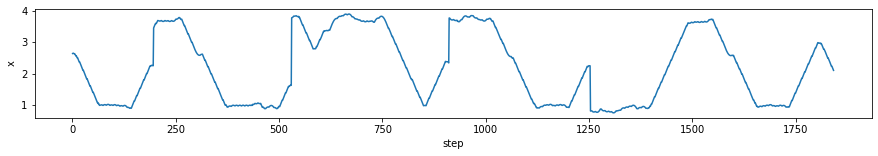

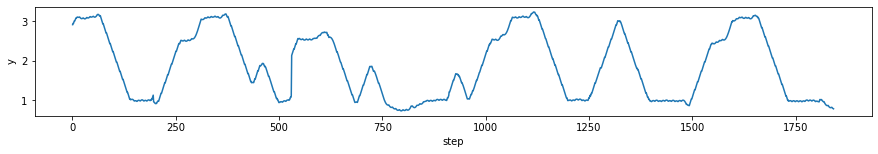

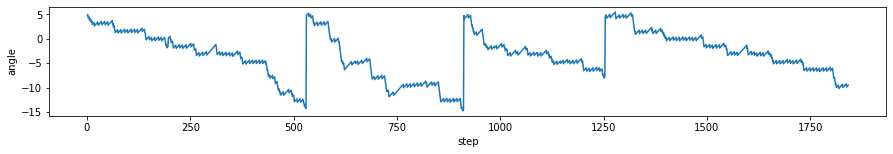

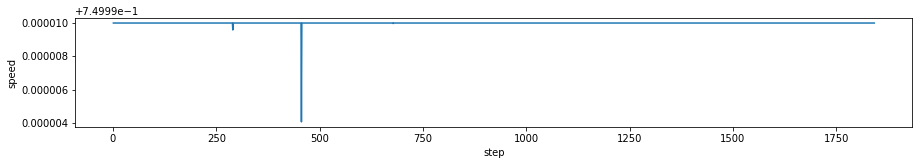

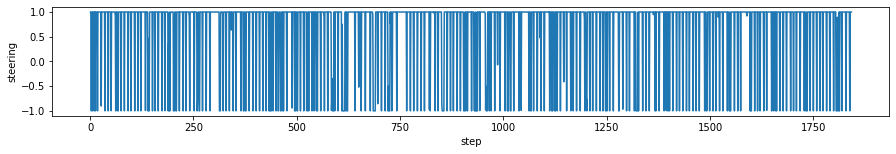

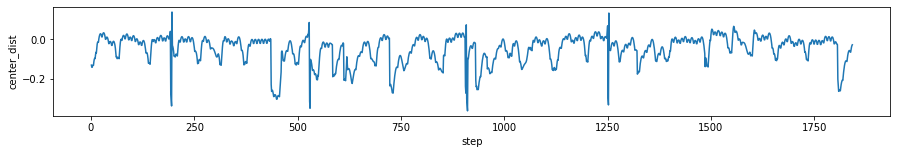

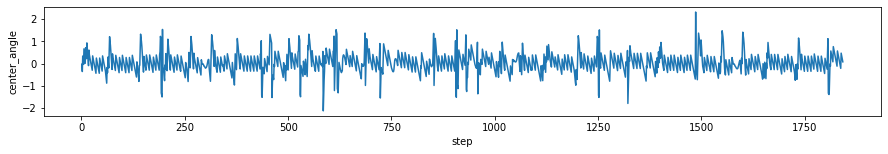

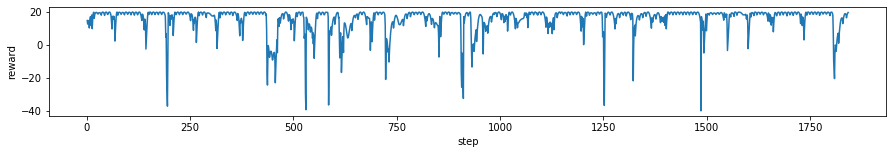

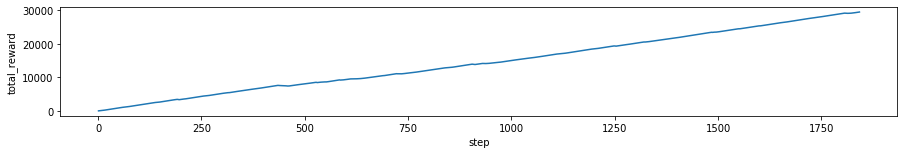

In [6]:
fields=['x', 'y', 'angle', 'speed', 'steering', 'center_dist', 'center_angle','reward', 'total_reward']

for field in fields:
    plt.figure(figsize=(15, 2))
    sns.lineplot(x='step',y=field, data=data)
    plt.show()
    


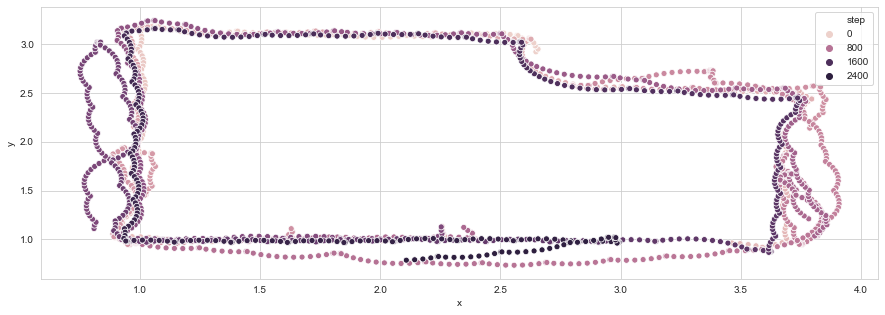

In [7]:
# Bot is wiggling and jerking but mostly staying on the road
plt.figure(figsize=(15, 5))
sns.set_style("whitegrid")
sns.scatterplot(x="x", y="y", hue='step', data=data)

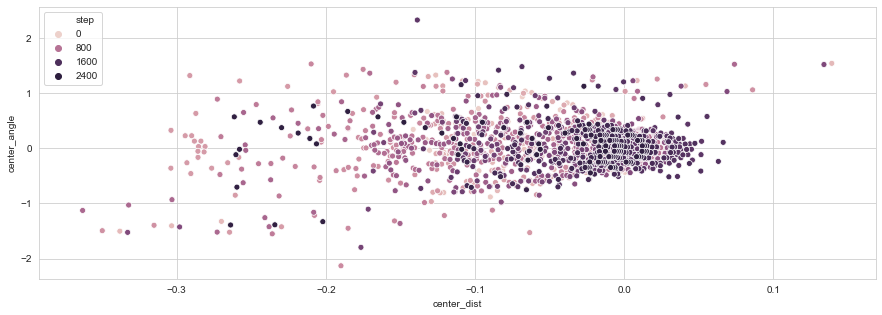

In [8]:
# Center distance and center angle are clustered near 0,0 as expected
# but many points are in the middle or oncoming side of the road
plt.figure(figsize=(15, 5))
sns.scatterplot(x="center_dist", y="center_angle", hue='step', data=data)

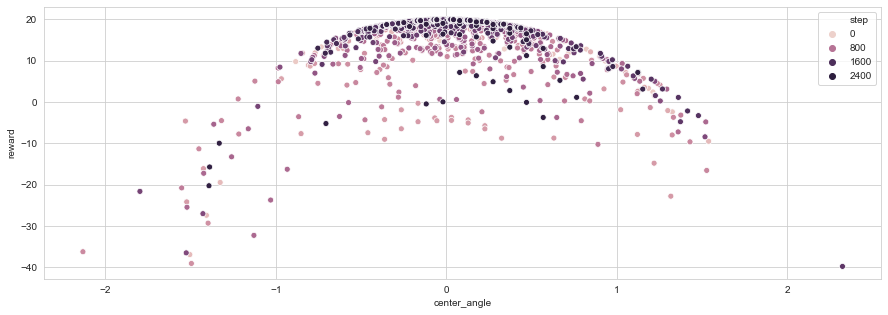

In [9]:
#Center angle reward function looks good
plt.figure(figsize=(15, 5))
sns.scatterplot(x="center_angle", y="reward", hue='step', data=data)

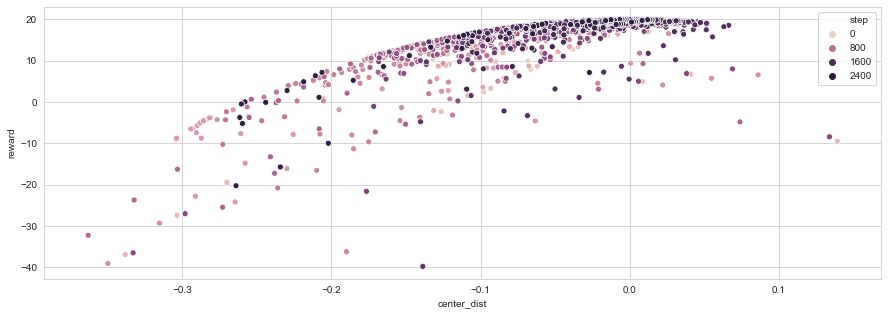

In [10]:
# Center distance reward function looks good
# But bot spends too much time in on-coming traffic
plt.figure(figsize=(15, 5))
sns.scatterplot(x="center_dist", y="reward", hue='step', data=data)

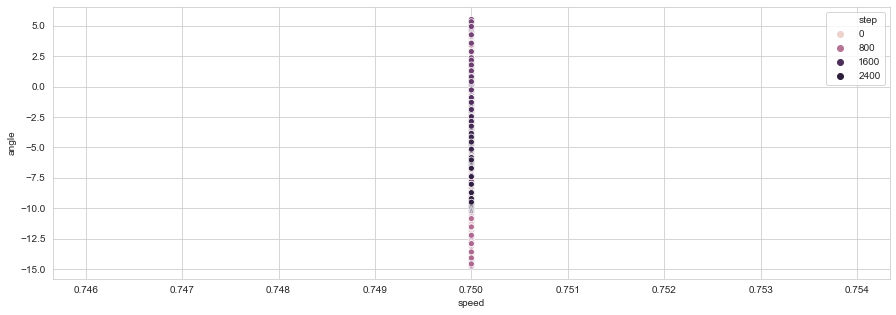

In [11]:
# Speed is always 0.75 which is the max speed allowed by the current action wrapper
# TODO: Remove this maximum
plt.figure(figsize=(15, 5))
sns.scatterplot(x="speed", y="angle", hue='step', data=data)

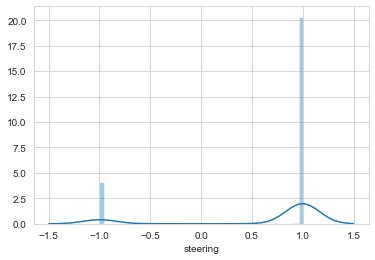

In [12]:
# Here we see the bot is always steering fully left or fully right
# TODO Figure out why this happens and how to fix this
sns.distplot(data['steering'])

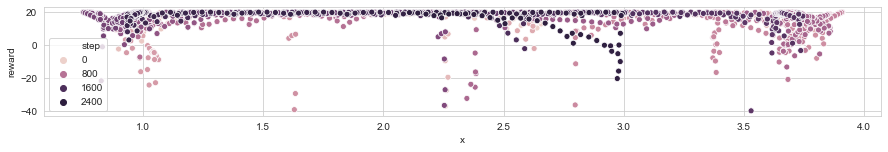

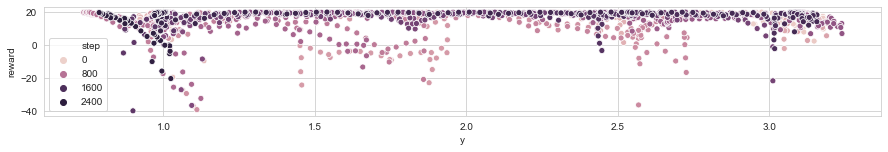

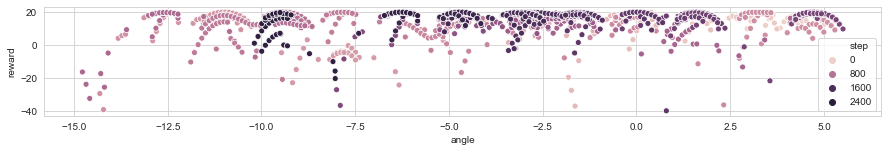

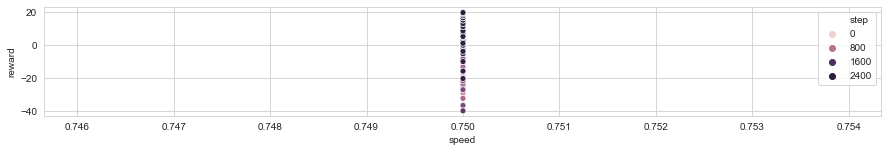

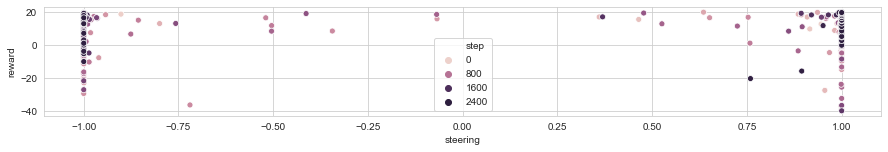

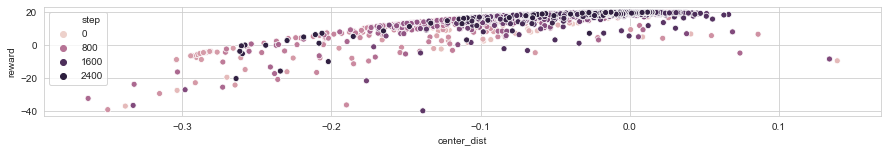

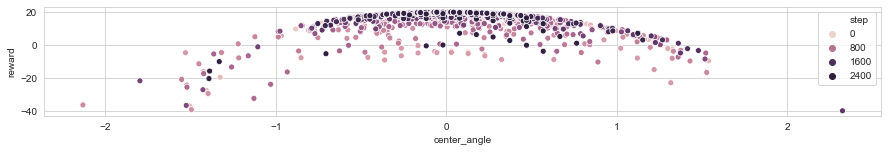

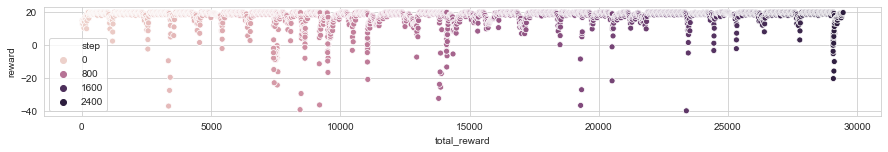

In [13]:
# Expected: As model improves, center dist should cluster closer to 0
# Actual:   All distances seem equally present, suggesting bot is all over the road
#plt.figure(figsize=(15, 5))
#sns.scatterplot(x="center_dist", y="reward", hue='step', data=data)

fields=['x', 'y', 'angle', 'speed', 'steering', 'center_dist', 'center_angle', 'total_reward']

for field in fields:
    plt.figure(figsize=(15, 2))
    sns.scatterplot(x=field, y="reward", hue='step', data=data)
    plt.show()
